In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import MDAnalysis as mda
from MDAnalysis.analysis import distances 
import pprint, pickle
import seaborn as sns

import sys
sys.path.append('../') ## to get src lib
import src.functions_analysis as analysis

In [2]:
#Here for GLUT3, check src.functions_analysis for numbering
gate_EC = [(29,35), (288,294)]
gate_IC = [(135,144), (383,391)]

In [3]:
#Using here GLUT3 simulations published in Qureshi et al. Nature (2020)
dir="glut3/"
protname="glut3_holo"

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


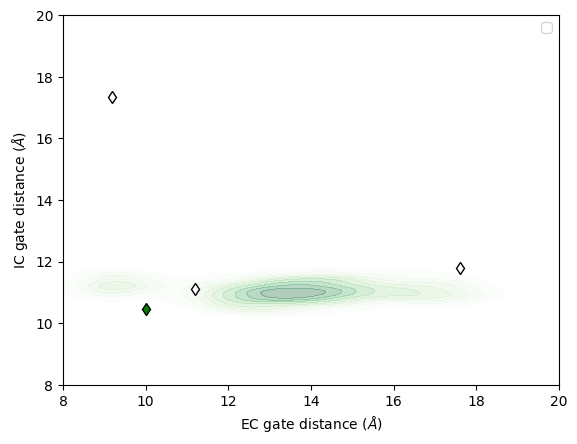

In [9]:
EC,IC=[],[]
for i in range(1,4):
    u = mda.Universe(dirgro+protname+str(i)+".start.gro",\
                    dirtraj+protname+str(i)+".skip250.xtc") 
    ec,ic=analysis.make_gate_arr(u, gate_EC , gate_IC )
    EC=np.append(EC,ec,axis=0)
    IC=np.append(IC,ic,axis=0) 
sns.kdeplot(x=EC,y=IC, fill=True, thresh=0.05, alpha=0.3,legend=True, cbar=False, cmap='Greens')
plt.plot(EC[0], IC[0],'d', markeredgecolor='k',zorder=200,c='green')    
plt.plot(17.592524286185284,11.77410964342615,'d',markeredgecolor='k',markerfacecolor='white',zorder=200) #ref outward open
plt.plot(9.194859911063936,17.34298802653404,'d',markeredgecolor='k',markerfacecolor='white',zorder=200) #ref inward open
plt.plot(11.20048522409587,11.11815754806446,'d',markeredgecolor='k',markerfacecolor='white',zorder=200) #ref occluded

plt.ylim(8,20)
plt.xlim(8,20) 
plt.xlabel(f'EC gate distance ($\AA$)')
plt.ylabel(f'IC gate distance ($\AA$)')
plt.legend()    
plt.show()
